<a href="https://colab.research.google.com/github/Eddav29/PCVK_GANJIL_2024/blob/main/pcvk_week_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive');

Mounted at /content/drive


In [5]:
#@title Import Library
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [6]:
#@title persiapan data

image_path = '/content/drive/MyDrive/PCVK/morphology.png'
image = cv2.imread(image_path)

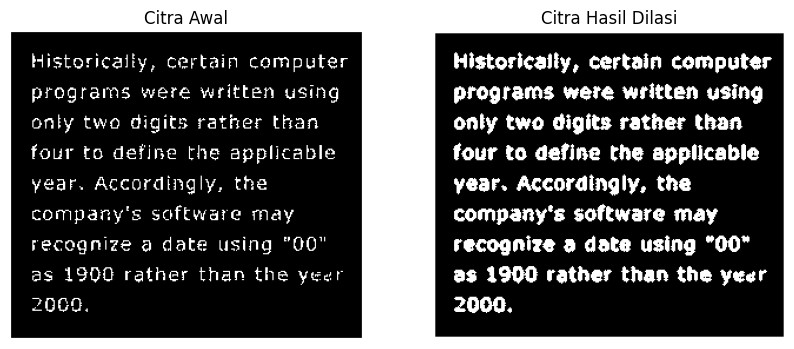

In [19]:
from PIL import Image

def dilasi(image, struct_elem):
    # Membuat array kosong untuk hasil dilasi dengan ukuran yang sama dengan gambar asli
    dilated_image = np.zeros_like(image)

    # Mendapatkan ukuran structuring element (cross 3x3)
    se_h, se_w = struct_elem.shape
    pad_h, pad_w = se_h // 2, se_w // 2  # Menghitung padding

    # Padding pada gambar asli untuk memungkinkan dilasi di tepi
    padded_image = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant', constant_values=0)

    # Looping melalui setiap piksel gambar
    for i in range(pad_h, padded_image.shape[0] - pad_h):
        for j in range(pad_w, padded_image.shape[1] - pad_w):
            # Mengambil patch dari gambar yang sesuai dengan structuring element
            patch = padded_image[i - pad_h:i + pad_h + 1, j - pad_w:j + pad_w + 1]

            # Jika ada piksel dalam patch sesuai dengan structuring element yang bernilai 1, set piksel output ke 1
            if np.any(patch[struct_elem == 1]):
                dilated_image[i - pad_h, j - pad_w] = 1

    return dilated_image

# Memuat gambar
img = Image.open('/content/drive/MyDrive/PCVK/morphology.png').convert('L')  # Konversi ke grayscale
img_array = np.array(img)
img_array = (img_array > 128).astype(np.uint8)  # Konversi gambar ke biner (0 atau 1)

# Membuat Structuring Element berbentuk cross 3x3
structuring_element = np.array([[0, 1, 0],
                                [1, 1, 1],
                                [0, 1, 0]])

# Mengaplikasikan fungsi dilasi
dilated_img = dilasi(img_array, structuring_element)

# Menampilkan gambar asli dan hasil dilasi
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Menampilkan citra awal
ax[0].imshow(img_array, cmap='gray')
ax[0].set_title('Citra Awal')
ax[0].axis('off')

# Menampilkan hasil dilasi
ax[1].imshow(dilated_img, cmap='gray')
ax[1].set_title('Citra Hasil Dilasi')
ax[1].axis('off')

plt.show()


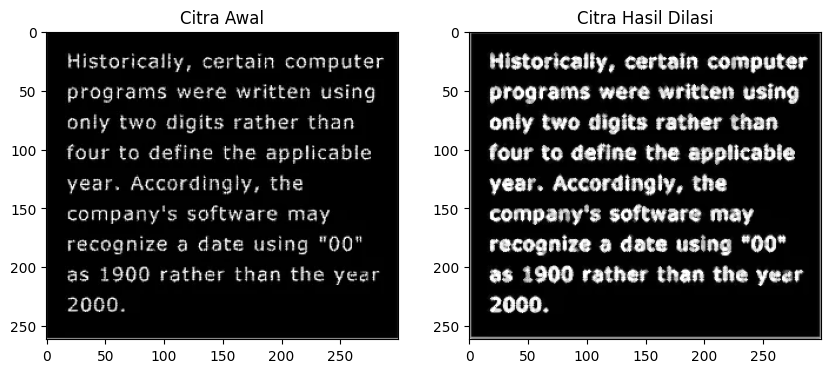

In [12]:
#@title Fungsi Dilasi dari Open CV
kernel = np.array([[0, 1, 0],
                   [1, 1, 1],
                   [0, 1, 0]], dtype=np.uint8)

# Melakukan operasi dilasi
dilated_image = cv2.dilate(image, kernel, iterations=1)

# Menampilkan hasil citra awal dan citra hasil dilasi
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Citra Awal')
plt.imshow(image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Citra Hasil Dilasi')
plt.imshow(dilated_image, cmap='gray')

plt.show()

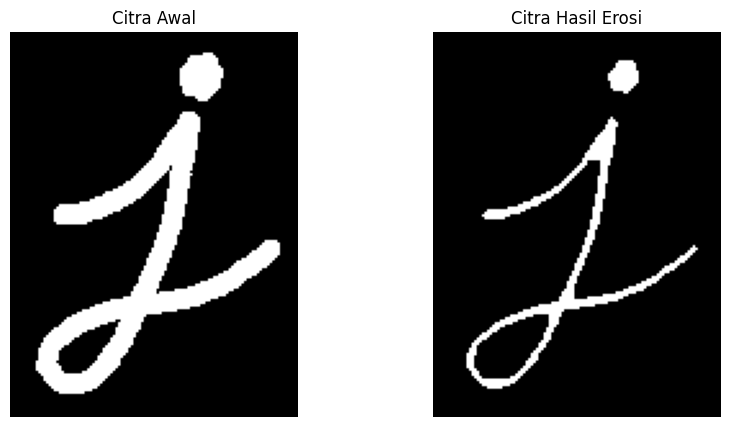

In [22]:
#@title fungsi erosi tanpa library open cv
def erosi(image, struct_elem):
    # Membuat array kosong untuk hasil erosi dengan ukuran yang sama dengan gambar asli
    eroded_image = np.zeros_like(image)

    # Mendapatkan ukuran structuring element (square 5x5)
    se_h, se_w = struct_elem.shape
    pad_h, pad_w = se_h // 2, se_w // 2  # Menghitung padding

    # Padding pada gambar asli untuk memungkinkan erosi di tepi
    padded_image = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant', constant_values=0)

    # Looping melalui setiap piksel gambar
    for i in range(pad_h, padded_image.shape[0] - pad_h):
        for j in range(pad_w, padded_image.shape[1] - pad_w):
            # Mengambil patch dari gambar yang sesuai dengan structuring element
            patch = padded_image[i - pad_h:i + pad_h + 1, j - pad_w:j + pad_w + 1]

            # Jika semua piksel dalam patch sesuai dengan structuring element bernilai 1, set piksel output ke 1
            if np.all(patch[struct_elem == 1]):
                eroded_image[i - pad_h, j - pad_w] = 1

    return eroded_image

# Memuat gambar
img = Image.open('/content/drive/MyDrive/PCVK/j.png').convert('L')  # Konversi ke grayscale
img_array = np.array(img)
img_array = (img_array > 128).astype(np.uint8)  # Konversi gambar ke biner (0 atau 1)

# Membuat Structuring Element berbentuk square 5x5
structuring_element = np.ones((5, 5), dtype=np.uint8)

# Mengaplikasikan fungsi erosi
eroded_img = erosi(img_array, structuring_element)

# Menampilkan gambar asli dan hasil erosi
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Menampilkan citra awal
ax[0].imshow(img_array, cmap='gray')
ax[0].set_title('Citra Awal')
ax[0].axis('off')

# Menampilkan hasil erosi
ax[1].imshow(eroded_img, cmap='gray')
ax[1].set_title('Citra Hasil Erosi')
ax[1].axis('off')

plt.show()

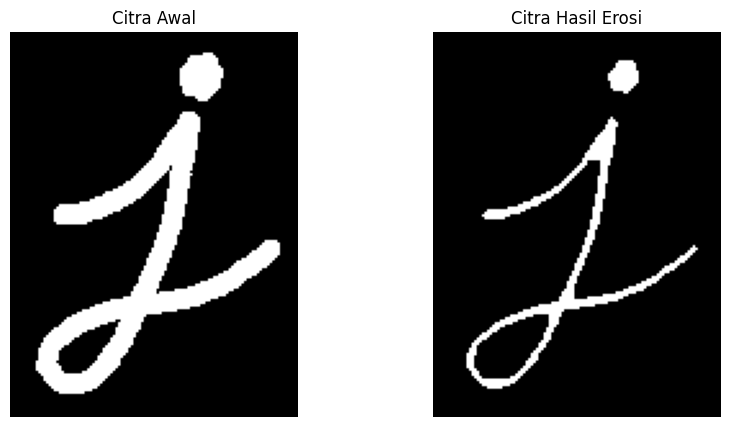

In [23]:
#@title Fungsi erosi menggunakan open cv
img = cv2.imread('/content/drive/MyDrive/PCVK/j.png', cv2.IMREAD_GRAYSCALE)

# Membuat Structuring Element berbentuk square 5x5
structuring_element = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))

# Mengaplikasikan operasi erosi
eroded_img = cv2.erode(img, structuring_element)

# Menampilkan gambar asli dan hasil erosi
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Menampilkan citra awal
ax[0].imshow(img, cmap='gray')
ax[0].set_title('Citra Awal')
ax[0].axis('off')

# Menampilkan hasil erosi
ax[1].imshow(eroded_img, cmap='gray')
ax[1].set_title('Citra Hasil Erosi')
ax[1].axis('off')

plt.show()

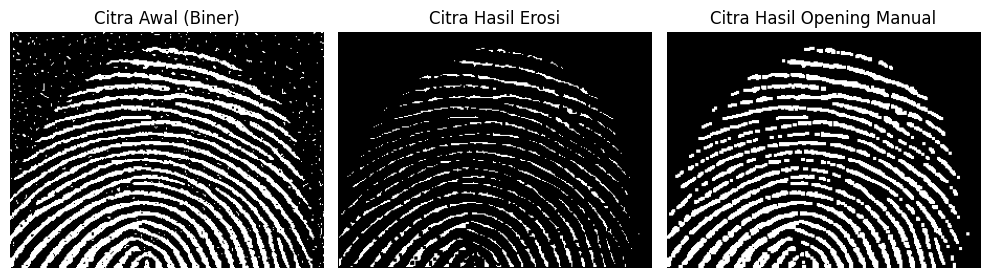

In [27]:
#@title implementasi operasi  dengan Structuring Element berbentuk square 3 x 3 tanpa opencv
# Load the fingerprint image
image_path = '/content/drive/MyDrive/PCVK/fingerprint.png'
img = cv2.imread(image_path, 0)

# Binarize the image (thresholding)
_, binary_img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

# Structuring element (3x3 square)
kernel = np.ones((3, 3), np.uint8)
k_size = kernel.shape[0]

def erode(image, kernel):
    img_padded = np.pad(image, pad_width=k_size//2, mode='constant', constant_values=0)
    img_eroded = np.zeros_like(image)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            # Check if all values under kernel are white (255)
            if np.min(img_padded[i:i+k_size, j:j+k_size]) == 255:
                img_eroded[i, j] = 255
            else:
                img_eroded[i, j] = 0

    return img_eroded

def dilate(image, kernel):
    img_padded = np.pad(image, pad_width=k_size//2, mode='constant', constant_values=0)
    img_dilated = np.zeros_like(image)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            # Check if any value under kernel is white (255)
            if np.max(img_padded[i:i+k_size, j:j+k_size]) == 255:
                img_dilated[i, j] = 255
            else:
                img_dilated[i, j] = 0

    return img_dilated

# Perform manual erosion
erosion_manual = erode(binary_img, kernel)

# Perform manual dilation on the result of erosion
opening_manual = dilate(erosion_manual, kernel)

# Plotting the results
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(binary_img, cmap='gray')
plt.title('Citra Awal (Biner)')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(erosion_manual, cmap='gray')
plt.title('Citra Hasil Erosi')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(opening_manual, cmap='gray')
plt.title('Citra Hasil Opening Manual')
plt.axis('off')

plt.tight_layout()
plt.show()


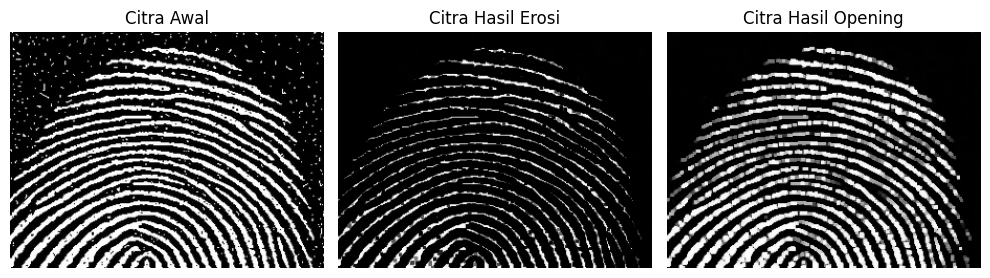

In [24]:
#@title implementasi operasi  dengan Structuring Element berbentuk square 3 x 3 dengan library open cv
# Load the fingerprint image
image_path = '/content/drive/MyDrive/PCVK/fingerprint.png'
img = cv2.imread(image_path, 0)

# Structuring element (3x3 square)
kernel = np.ones((3, 3), np.uint8)

# Without using morphology function (Manual Erosion and Dilation)
# Step 1: Erosion
erosion_manual = cv2.erode(img, kernel, iterations=1)

# Step 2: Dilation (apply on the result of erosion)
opening_manual = cv2.dilate(erosion_manual, kernel, iterations=1)

# Using OpenCV morphology function
opening_morphology = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)

# Plotting the results
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Citra Awal')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(erosion_manual, cmap='gray')
plt.title('Citra Hasil Erosi')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(opening_morphology, cmap='gray')
plt.title('Citra Hasil Opening')
plt.axis('off')

plt.tight_layout()
plt.show()


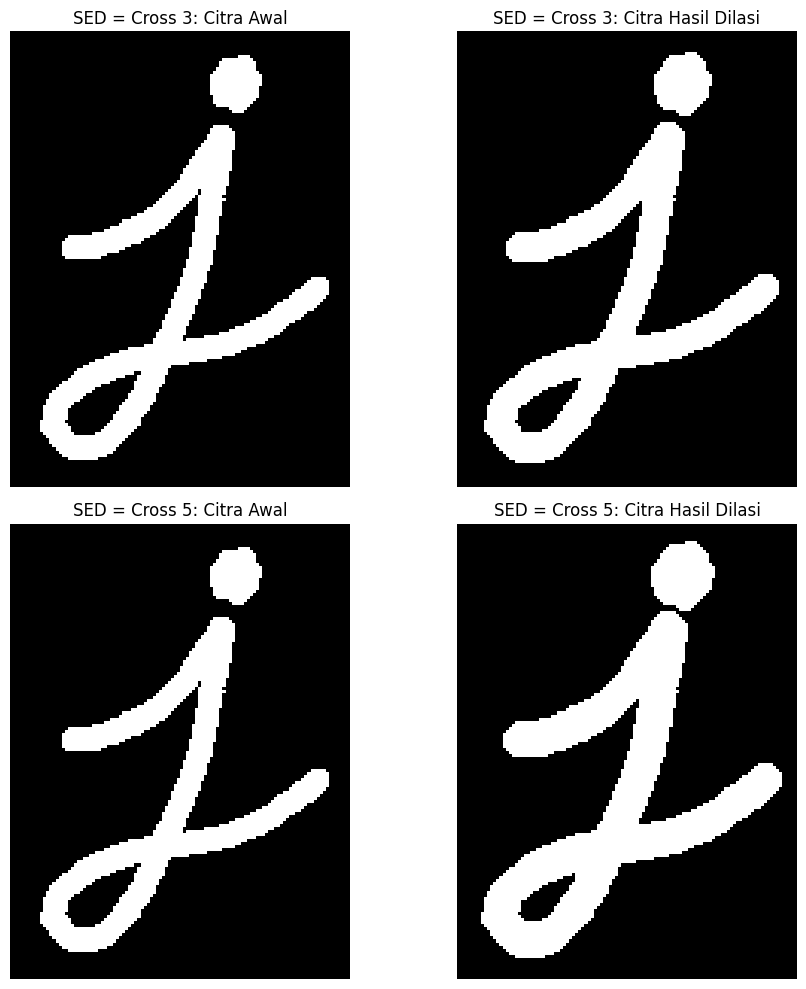

In [28]:
# Memuat gambar
img = cv2.imread('/content/drive/MyDrive/PCVK/j.png', cv2.IMREAD_GRAYSCALE)

# Membuat Structuring Element berbentuk cross 3x3 dan cross 5x5
structuring_element_3x3 = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))
structuring_element_5x5 = cv2.getStructuringElement(cv2.MORPH_CROSS, (5, 5))

# Mengaplikasikan operasi dilasi
dilated_img_3x3 = cv2.dilate(img, structuring_element_3x3)
dilated_img_5x5 = cv2.dilate(img, structuring_element_5x5)

# Menampilkan gambar asli dan hasil dilasi
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

# Cross 3x3
ax[0, 0].imshow(img, cmap='gray')
ax[0, 0].set_title('SED = Cross 3: Citra Awal')
ax[0, 0].axis('off')

ax[0, 1].imshow(dilated_img_3x3, cmap='gray')
ax[0, 1].set_title('SED = Cross 3: Citra Hasil Dilasi')
ax[0, 1].axis('off')

# Cross 5x5
ax[1, 0].imshow(img, cmap='gray')
ax[1, 0].set_title('SED = Cross 5: Citra Awal')
ax[1, 0].axis('off')

ax[1, 1].imshow(dilated_img_5x5, cmap='gray')
ax[1, 1].set_title('SED = Cross 5: Citra Hasil Dilasi')
ax[1, 1].axis('off')

plt.tight_layout()
plt.show()


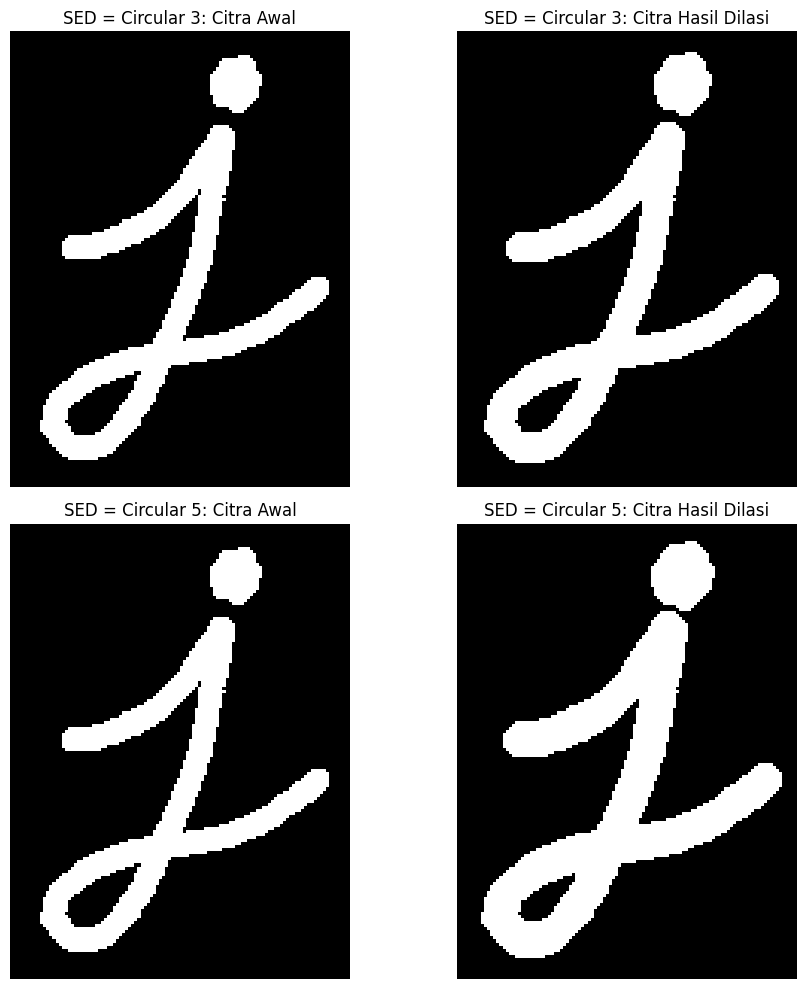

In [30]:


# Membuat Structuring Element berbentuk circular 3x3
def circular_structuring_element(radius):
    # Ukuran dari kernel yang mencakup diameter lingkaran
    diameter = 2 * radius + 1
    se = np.zeros((diameter, diameter), dtype=np.uint8)

    # Mengisi SE dengan lingkaran
    center = radius
    for i in range(diameter):
        for j in range(diameter):
            if (i - center) ** 2 + (j - center) ** 2 <= radius ** 2:
                se[i, j] = 1
    return se

# Memuat gambar
img = cv2.imread('/content/drive/MyDrive/PCVK/j.png', cv2.IMREAD_GRAYSCALE)

# Membuat Structuring Element berbentuk circular 3x3 dan 5x5
se_circular_3x3 = circular_structuring_element(1)  # radius 1 menghasilkan diameter 3x3
se_circular_5x5 = circular_structuring_element(2)  # radius 2 menghasilkan diameter 5x5

# Mengaplikasikan operasi dilasi dengan SE circular
dilated_img_3x3 = cv2.dilate(img, se_circular_3x3)
dilated_img_5x5 = cv2.dilate(img, se_circular_5x5)

# Menampilkan gambar asli dan hasil dilasi
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

# Circular 3x3
ax[0, 0].imshow(img, cmap='gray')
ax[0, 0].set_title('SED = Circular 3: Citra Awal')
ax[0, 0].axis('off')

ax[0, 1].imshow(dilated_img_3x3, cmap='gray')
ax[0, 1].set_title('SED = Circular 3: Citra Hasil Dilasi')
ax[0, 1].axis('off')

# Circular 5x5
ax[1, 0].imshow(img, cmap='gray')
ax[1, 0].set_title('SED = Circular 5: Citra Awal')
ax[1, 0].axis('off')

ax[1, 1].imshow(dilated_img_5x5, cmap='gray')
ax[1, 1].set_title('SED = Circular 5: Citra Hasil Dilasi')
ax[1, 1].axis('off')

plt.tight_layout()
plt.show()


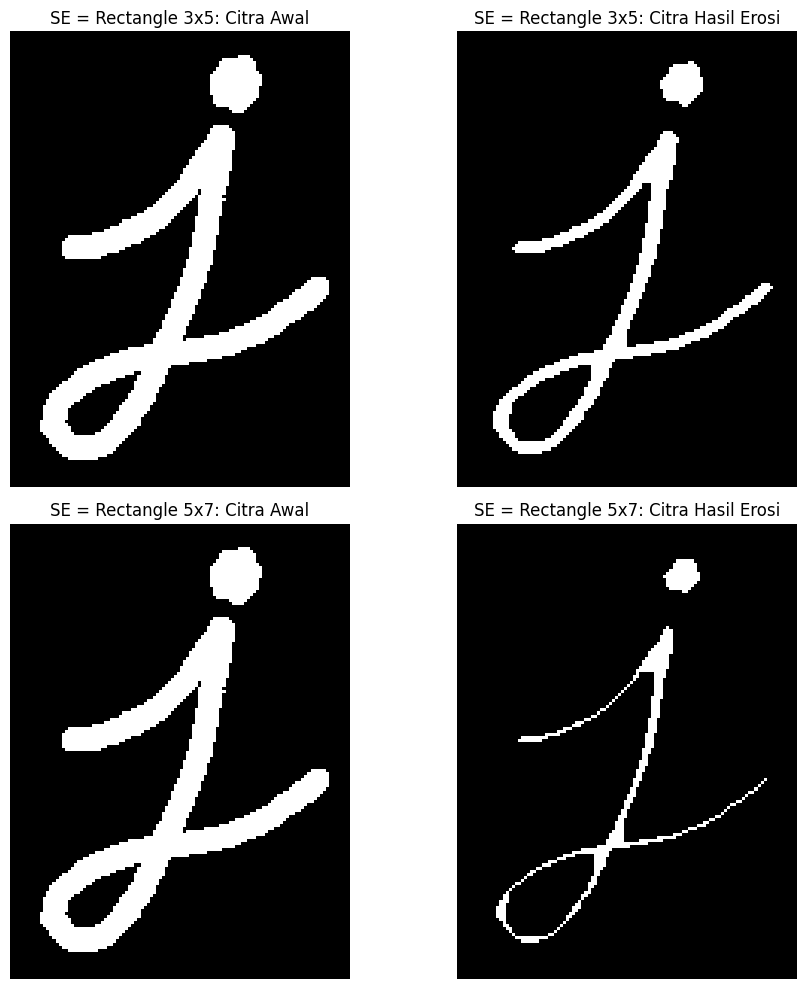

In [31]:

# Memuat gambar
img = cv2.imread('/content/drive/MyDrive/PCVK/j.png', cv2.IMREAD_GRAYSCALE)

# Membuat Structuring Element berbentuk Rectangle 3x5 dan 5x7
se_rectangle_3x5 = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 5))
se_rectangle_5x7 = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 7))

# Mengaplikasikan operasi erosi dengan SE rectangular
eroded_img_3x5 = cv2.erode(img, se_rectangle_3x5)
eroded_img_5x7 = cv2.erode(img, se_rectangle_5x7)

# Menampilkan gambar asli dan hasil erosi
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

# Rectangle 3x5
ax[0, 0].imshow(img, cmap='gray')
ax[0, 0].set_title('SE = Rectangle 3x5: Citra Awal')
ax[0, 0].axis('off')

ax[0, 1].imshow(eroded_img_3x5, cmap='gray')
ax[0, 1].set_title('SE = Rectangle 3x5: Citra Hasil Erosi')
ax[0, 1].axis('off')

# Rectangle 5x7
ax[1, 0].imshow(img, cmap='gray')
ax[1, 0].set_title('SE = Rectangle 5x7: Citra Awal')
ax[1, 0].axis('off')

ax[1, 1].imshow(eroded_img_5x7, cmap='gray')
ax[1, 1].set_title('SE = Rectangle 5x7: Citra Hasil Erosi')
ax[1, 1].axis('off')

plt.tight_layout()
plt.show()


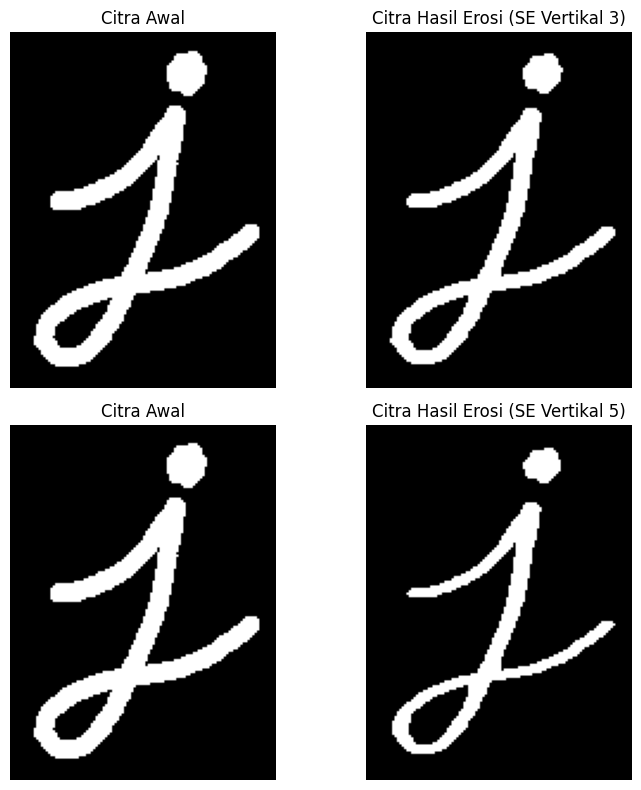

In [34]:
# Load the image (convert it to grayscale)
img = cv2.imread('/content/drive/MyDrive/PCVK/j.png', cv2.IMREAD_GRAYSCALE)

# Structuring elements
SE_vertical_3 = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 3))  # Vertical line of size 3
SE_vertical_5 = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 5))  # Vertical line of size 5

# Perform erosion
eroded_image_3 = cv2.erode(image, SE_vertical_3, iterations=1)
eroded_image_5 = cv2.erode(image, SE_vertical_5, iterations=1)

# Plotting the results
fig, axes = plt.subplots(2, 2, figsize=(8, 8))

# Original images
axes[0, 0].imshow(image, cmap='gray')
axes[0, 0].set_title("Citra Awal")
axes[0, 0].axis('off')

axes[1, 0].imshow(image, cmap='gray')
axes[1, 0].set_title("Citra Awal")
axes[1, 0].axis('off')

# Eroded images
axes[0, 1].imshow(eroded_image_3, cmap='gray')
axes[0, 1].set_title("Citra Hasil Erosi (SE Vertikal 3)")
axes[0, 1].axis('off')

axes[1, 1].imshow(eroded_image_5, cmap='gray')
axes[1, 1].set_title("Citra Hasil Erosi (SE Vertikal 5)")
axes[1, 1].axis('off')

# Show the plot
plt.tight_layout()
plt.show()